# Importing all necessary Libraries

In [1]:
# For data access
import pandas as pd

# For splitting data
import numpy as np
from sklearn.model_selection import train_test_split

# Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier as knn

# Using SVM classifier
from sklearn.svm import SVC

# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Using KNN Imputer
from sklearn.impute import KNNImputer

# Using cross_value for cross-validation
from sklearn.model_selection import cross_val_score

# Using KFold cross-validation
from sklearn.model_selection import KFold as kf

# Using StratifiedKFold and GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Using accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Using confusion matrix
from sklearn.metrics import confusion_matrix

# Using Standard Scaler
from sklearn.preprocessing import StandardScaler

# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Using CatBoostClassifier
from catboost import CatBoostClassifier

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


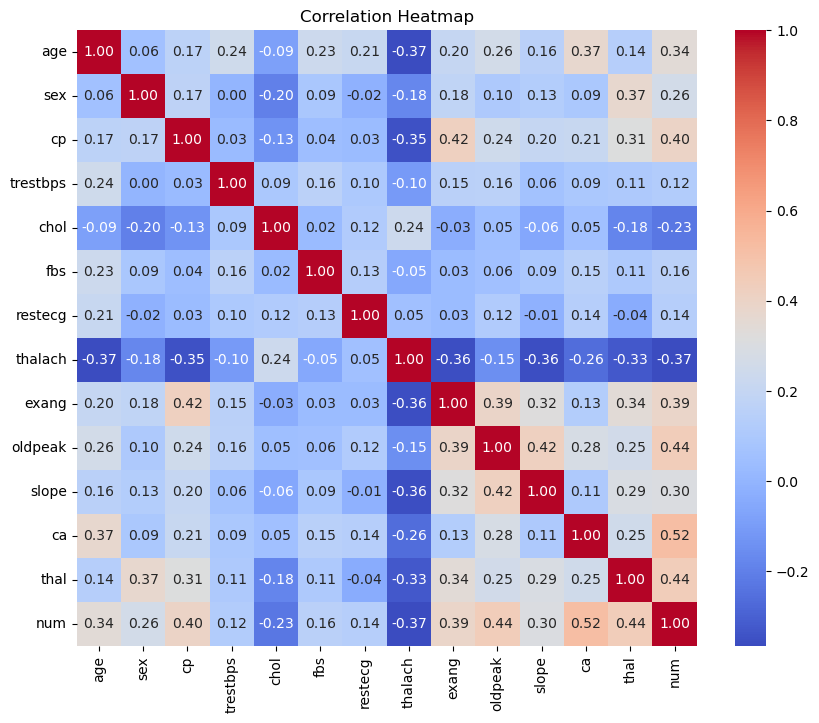

In [2]:
# Reading the CSV file into a DataFrame
a = pd.read_csv('sathvi dataset.csv')

# Replacing '?' with NA (null values)
a.replace('?', pd.NA, inplace=True)

# Converting specific columns to numeric data types
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = a.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# CatBoost Classifier Using Mean Imputation

In [3]:
# Reading the CSV file into a DataFrame
a = pd.read_csv('sathvi dataset.csv')

# Replacing '?' with NA (null values)
a.replace('?', pd.NA, inplace=True)

# Displaying the count of missing values
print("Count of NUll Values for each Attribute:\n")
print(a.isnull().sum())

# Converting specific columns to numeric data types
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

# Converting 'num' column to binary (0 or 1)
a['num'] = np.where(a['num'] > 0, 1, 0)

# Filling missing values with group-wise means
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform('mean'), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform('mean'), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform('mean'), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform('mean'), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform('mean'), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform('mean'), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform('mean'), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform('mean'), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform('mean'), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform('mean'), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform('mean'), inplace=True)
a['chol'].fillna(a['chol'].mean(), inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform('mean'), inplace=True)
a['thalach'].fillna(a['thalach'].mean(), inplace=True)


# Displaying the count of missing values after filling
print("The count of missing values after Applying Mean Imputation:\n")
print(a.isnull().sum())
print("\n")

a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

print(len(a.columns))
print(a.columns)
print(a)
# Separating features and target variable
X = a.drop("num", axis=1)
y = a.num

# Displaying the count of target variable classes
print("Count Of Target Variable Classes:\n",y.value_counts())

# Scaling the features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


Count of NUll Values for each Attribute:

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
The count of missing values after Applying Mean Imputation:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


33
Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'num',
       'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_0.0',
       'restecg_0.5', 'restecg_0.625', 'restecg_1.0', 'restecg_2.0',
       'exang_0.0', 'exang_0.38420348058902276', 'exang_0.423728813559322',
       'exang_1.0', 'slope_1.0', 'slope_1.4908256880733946',
       'slope_1.9262086513994912', 'slope_2.0', 'slope_3.0', 'thal_3.0',
       'thal_3.9893

## Hyper Parameter Tuning

In [15]:
# Define the parameter grid for CatBoostClassifier
random_grid_cat = {
    'iterations': range(100, 1001, 100),          
    'depth': range(4, 11),                       
    'learning_rate': np.logspace(-3, 0, 10),      
    'l2_leaf_reg': np.logspace(-6, 2, 10),      
    'border_count': range(32, 129, 16),           
    'bagging_temperature': np.linspace(0, 1, 10), 
    'scale_pos_weight': np.linspace(0.1, 1, 10),  
    'rsm': np.linspace(0.1, 1, 10)  
}

# Define the StratifiedKFold and CatBoostClassifier
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
catboost = CatBoostClassifier(verbose=1)

# RandomizedSearchCV for CatBoostClassifier
randomcv_cat = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=random_grid_cat,
    n_iter=180,
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Fit the randomized model for CatBoost
randomcv_cat.fit(X, y)

# Print the best parameters for CatBoost
print("Best Parameters (CatBoost):", randomcv_cat.best_params_)
print("Best Score (CatBoost):", randomcv_cat.best_score_ * 100)

# Define the parameter grid based on the best parameters from RandomizedSearchCV
param_grid_cat = {
    'iterations': [randomcv_cat.best_params_['iterations']],
    'learning_rate': [randomcv_cat.best_params_['learning_rate'],
                      randomcv_cat.best_params_['learning_rate']+0.1,
                      randomcv_cat.best_params_['learning_rate']-0.1,
                      randomcv_cat.best_params_['learning_rate']+0.2,
                      randomcv_cat.best_params_['learning_rate']-0.2],
    'depth': [randomcv_cat.best_params_['depth'],randomcv_cat.best_params_['depth']+2,randomcv_cat.best_params_['depth']-2,],
    'l2_leaf_reg': [randomcv_cat.best_params_['l2_leaf_reg']],
    'border_count':[randomcv_cat.best_params_['border_count']],           
    'bagging_temperature':[ randomcv_cat.best_params_['bagging_temperature']], 
    'scale_pos_weight':[randomcv_cat.best_params_['scale_pos_weight']],  
    'rsm': [randomcv_cat.best_params_['rsm']] 
}

# GridSearchCV for CatBoostClassifier
grid_search_cat = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid_cat,
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Fit the grid_search to the data for CatBoost
grid_search_cat.fit(X, y)

# Print the best parameters and best score for CatBoost
print("Best Parameters (CatBoost):", grid_search_cat.best_params_)
print("Best Score (CatBoost):", grid_search_cat.best_score_ * 100)


Fitting 7 folds for each of 180 candidates, totalling 1260 fits
0:	learn: 0.6846026	total: 1.66ms	remaining: 1.66s
1:	learn: 0.6771938	total: 3.47ms	remaining: 1.73s
2:	learn: 0.6690194	total: 5.27ms	remaining: 1.75s
3:	learn: 0.6612021	total: 6.79ms	remaining: 1.69s
4:	learn: 0.6531758	total: 8.35ms	remaining: 1.66s
5:	learn: 0.6452794	total: 9.78ms	remaining: 1.62s
6:	learn: 0.6389090	total: 11ms	remaining: 1.56s
7:	learn: 0.6313193	total: 12.4ms	remaining: 1.53s
8:	learn: 0.6249262	total: 13.9ms	remaining: 1.52s
9:	learn: 0.6183820	total: 15.2ms	remaining: 1.51s
10:	learn: 0.6112908	total: 16.6ms	remaining: 1.49s
11:	learn: 0.6044613	total: 18.3ms	remaining: 1.51s
12:	learn: 0.5974717	total: 20.1ms	remaining: 1.53s
13:	learn: 0.5900867	total: 21.6ms	remaining: 1.52s
14:	learn: 0.5833997	total: 23ms	remaining: 1.51s
15:	learn: 0.5762069	total: 24.4ms	remaining: 1.5s
16:	learn: 0.5702005	total: 26ms	remaining: 1.5s
17:	learn: 0.5644800	total: 27.1ms	remaining: 1.48s
18:	learn: 0.55794

In [4]:
from collections import Counter
# Define the parameter grid
param_grid = {
    'bagging_temperature': 0.6666666666666666,
    'border_count': 48, 
    'depth': 7, 
    'iterations': 1000,
    'l2_leaf_reg': 1.6681005372000557,
    'learning_rate': 0.004641588833612777, 
    'rsm': 0.7000000000000001, 
    'scale_pos_weight': 0.30000000000000004
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t  CatBoostClassifier Mean Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

   # Create a  CatBoostClassifier with the provided parameters
    catboost = CatBoostClassifier(loss_function='Logloss', **param_grid,verbose=False)

    # Train the model
    catboost.fit(X_train, y_train)
    test_pred = catboost.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit-{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	  CatBoostClassifier Mean Imputation: 

Split-1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[59  0]
 [ 5 68]]
 Test Accuracy: 96.21
 Test Precision: 100.0
 Test Recall: 93.15
 Test F1 Score: 96.45
--------------------------------******------------------------------
Split-2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[57  2]
 [ 5 68]]
 Test Accuracy: 94.7
 Test Precision: 97.14
 Test Recall: 93.15
 Test F1 Score: 95.1
--------------------------------******------------------------------
Split-3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[54  5]
 [10 63]]
 Test Accuracy: 88.64
 Test Precision: 92.65
 Test Recall: 86.3
 Test F1 Score: 89.36
--------------------------------******------------------------------
Split-4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[55  3]
 [ 7 66]]
 Test Accuracy: 92.37
 Test Precision: 95.65
 Test Recall: 90.41
 Test F1 Score: 92.96
--------------------------------******------------------------------
Split

# CatBoost Classifier Using Mode Imputation

In [10]:
a=pd.read_csv('sathvi dataset.csv')
a.replace('?',pd.NA,inplace=True)

a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

a['num'] = np.where(a['num'] > 0, 1, 0)

a['restecg'].fillna(a.groupby(["age"])['restecg'].transform(lambda x: x.mode()[0]),inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform(lambda x: x.mode()[0]),inplace=True)
a['fbs']=np.where(a['fbs']>0.5,1,0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform(lambda x: x.mode()[0]),inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform(lambda x: x.mode()[0]),inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform(lambda x: x.mode()[0]),inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform(lambda x: x.mode()[0]),inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform(lambda x: x.mode()[0]),inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform(lambda x: x.mode()[0]),inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform(lambda x: x.mode()[0]),inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform(lambda x: x.mode()[0]),inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform(lambda x: x.mode()[0]),inplace=True)
a['chol'].fillna(a['chol'].mode()[0],inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform(lambda x: x.mode()[0] if not x.mode().empty else 0),inplace=True)
a['thalach'].fillna(a['thalach'].mode()[0],inplace=True)
a.isnull().sum()

a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])


X=a.drop("num",axis=1)
y=a.num
y.value_counts()


from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X = scaler.fit_transform(X)


## Hyper Parameter Tuning

In [14]:
# Define the parameter grid for CatBoostClassifier
random_grid_cat = {
    'iterations': range(100, 1001, 100),          
    'depth': range(4, 11),                       
    'learning_rate': np.logspace(-3, 0, 10),      
    'l2_leaf_reg': np.logspace(-6, 2, 10),      
    'border_count': range(32, 129, 16),           
    'bagging_temperature': np.linspace(0, 1, 10), 
    'scale_pos_weight': np.linspace(0.1, 1, 10),  
    'rsm': np.linspace(0.1, 1, 10)  
}

# Define the StratifiedKFold and CatBoostClassifier
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
catboost = CatBoostClassifier(verbose=1)

# RandomizedSearchCV for CatBoostClassifier
randomcv_cat = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=random_grid_cat,
    n_iter=180,
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Fit the randomized model for CatBoost
randomcv_cat.fit(X, y)

# Print the best parameters for CatBoost
print("Best Parameters (CatBoost):", randomcv_cat.best_params_)
print("Best Score (CatBoost):", randomcv_cat.best_score_ * 100)

# Define the parameter grid based on the best parameters from RandomizedSearchCV
param_grid_cat = {
    'iterations': [randomcv_cat.best_params_['iterations']],
    'learning_rate': [randomcv_cat.best_params_['learning_rate'],
                      randomcv_cat.best_params_['learning_rate']+0.1,
                      randomcv_cat.best_params_['learning_rate']-0.1,
                      randomcv_cat.best_params_['learning_rate']+0.2,
                      randomcv_cat.best_params_['learning_rate']-0.2],
    'depth': [randomcv_cat.best_params_['depth'],randomcv_cat.best_params_['depth']+2,randomcv_cat.best_params_['depth']-2,],
    'l2_leaf_reg': [randomcv_cat.best_params_['l2_leaf_reg']],
    'border_count':[randomcv_cat.best_params_['border_count']],           
    'bagging_temperature':[ randomcv_cat.best_params_['bagging_temperature']], 
    'scale_pos_weight':[randomcv_cat.best_params_['scale_pos_weight']],  
    'rsm': [randomcv_cat.best_params_['rsm']] 
}

# GridSearchCV for CatBoostClassifier
grid_search_cat = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid_cat,
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Fit the grid_search to the data for CatBoost
grid_search_cat.fit(X, y)

# Print the best parameters and best score for CatBoost
print("Best Parameters (CatBoost):", grid_search_cat.best_params_)
print("Best Score (CatBoost):", grid_search_cat.best_score_ * 100)


Fitting 7 folds for each of 180 candidates, totalling 1260 fits
0:	learn: 0.6830409	total: 2.94ms	remaining: 2.93s
1:	learn: 0.6715250	total: 5.31ms	remaining: 2.65s
2:	learn: 0.6600959	total: 7.93ms	remaining: 2.64s
3:	learn: 0.6518803	total: 10.8ms	remaining: 2.68s
4:	learn: 0.6430717	total: 13.7ms	remaining: 2.73s
5:	learn: 0.6340425	total: 16.5ms	remaining: 2.73s
6:	learn: 0.6251930	total: 19.3ms	remaining: 2.73s
7:	learn: 0.6156881	total: 21.7ms	remaining: 2.69s
8:	learn: 0.6069334	total: 24.2ms	remaining: 2.67s
9:	learn: 0.5986923	total: 27ms	remaining: 2.67s
10:	learn: 0.5899265	total: 29.4ms	remaining: 2.65s
11:	learn: 0.5807985	total: 31.1ms	remaining: 2.56s
12:	learn: 0.5722149	total: 33.5ms	remaining: 2.54s
13:	learn: 0.5627543	total: 36.2ms	remaining: 2.55s
14:	learn: 0.5550169	total: 38.8ms	remaining: 2.54s
15:	learn: 0.5474329	total: 41.4ms	remaining: 2.54s
16:	learn: 0.5406001	total: 44ms	remaining: 2.54s
17:	learn: 0.5324571	total: 46.9ms	remaining: 2.56s
18:	learn: 0.5

In [11]:
# Define the parameter grid
param_grid = {
    'bagging_temperature': 0.8888888888888888,
    'border_count': 48, 
    'depth': 5, 
    'iterations': 1000,
    'l2_leaf_reg': 12.915496650148826, 
    'learning_rate': 0.01,
    'rsm': 0.9, 
    'scale_pos_weight': 0.7000000000000001
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t CatBoostClassifier Mode Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a  CatBoostClassifier with the provided parameters
    catboost = CatBoostClassifier(loss_function='Logloss', **param_grid,verbose=False)

    # Train the model
    catboost.fit(X_train, y_train)
    test_pred = catboost.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	 CatBoostClassifier Mode Imputation: 

Split -1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[57  2]
 [ 3 70]]
 Test Accuracy: 96.21
 Test Precision: 97.22
 Test Recall: 95.89
 Test F1 Score: 96.55
--------------------------------******------------------------------
Split -2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 4 69]]
 Test Accuracy: 93.18
 Test Precision: 93.24
 Test Recall: 94.52
 Test F1 Score: 93.88
--------------------------------******------------------------------
Split -3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[54  5]
 [ 6 67]]
 Test Accuracy: 91.67
 Test Precision: 93.06
 Test Recall: 91.78
 Test F1 Score: 92.41
--------------------------------******------------------------------
Split -4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[52  6]
 [ 6 67]]
 Test Accuracy: 90.84
 Test Precision: 91.78
 Test Recall: 91.78
 Test F1 Score: 91.78
--------------------------------******------------------------------

# CatBoost Classifier Using Median Imputation

In [14]:
# Load the dataset
a = pd.read_csv('sathvi dataset.csv')
a.replace('?', pd.NA, inplace=True)

# Convert columns to numeric, handle missing values, and create binary 'num' column
a['age'] = pd.to_numeric(a['age'], errors='coerce')
a['restecg'] = pd.to_numeric(a['restecg'], errors='coerce')
a['oldpeak'] = pd.to_numeric(a['oldpeak'], errors='coerce')
a['fbs'] = pd.to_numeric(a['fbs'], errors='coerce')
a['chol'] = pd.to_numeric(a['chol'], errors='coerce')
a['thalach'] = pd.to_numeric(a['thalach'], errors='coerce')
a['trestbps'] = pd.to_numeric(a['trestbps'], errors='coerce')
a['exang'] = pd.to_numeric(a['exang'], errors='coerce')
a['thal'] = pd.to_numeric(a['thal'], errors='coerce')
a['slope'] = pd.to_numeric(a['slope'], errors='coerce')
a['ca'] = pd.to_numeric(a['ca'], errors='coerce')

a['num'] = np.where(a['num'] > 0, 1, 0)

# Fill missing values using median imputation
a['restecg'].fillna(a.groupby(["age"])['restecg'].transform('median'), inplace=True)
a['fbs'].fillna(a.groupby(["age"])['fbs'].transform('median'), inplace=True)
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)
a['oldpeak'].fillna(a.groupby(["fbs"])['oldpeak'].transform('median'), inplace=True)
a['exang'].fillna(a.groupby(["fbs"])['exang'].transform('median'), inplace=True)
a['trestbps'].fillna(a.groupby(["age"])['trestbps'].transform('median'), inplace=True)
a['thal'].fillna(a.groupby(["num"])['thal'].transform('median'), inplace=True)
a['thal'].fillna(a.groupby(["fbs"])['thal'].transform('median'), inplace=True)
a['slope'].fillna(a.groupby(["num"])['slope'].transform('median'), inplace=True)
a['slope'].fillna(a.groupby(["fbs"])['slope'].transform('median'), inplace=True)
a['ca'].fillna(a.groupby(["thal"])['ca'].transform('median'), inplace=True)
a['ca'].fillna(a.groupby(["fbs"])['ca'].transform('median'), inplace=True)
a['chol'].fillna(a['chol'].median(), inplace=True)
a['thalach'].fillna(a.groupby(["chol"])['thalach'].transform('median'), inplace=True)
a['thalach'].fillna(a['thalach'].median(), inplace=True)
print(a.isnull().sum())

# One-hot encode categorical columns
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Separate features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num

# Standardize features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Hyper parameter Tuning

In [20]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
import numpy as np

# Define the parameter grid for CatBoostClassifier
random_grid_cat = {
    'iterations': range(100, 1001, 100),          
    'depth': range(4, 11),                       
    'learning_rate': np.logspace(-3, 0, 10),      
    'l2_leaf_reg': np.logspace(-6, 2, 10),      
    'border_count': range(32, 129, 16),           
    'bagging_temperature': np.linspace(0, 1, 10), 
    'scale_pos_weight': np.linspace(0.1, 1, 10),  
    'rsm': np.linspace(0.1, 1, 10)  
}

# Define the StratifiedKFold and CatBoostClassifier
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
catboost = CatBoostClassifier(verbose=1)

# RandomizedSearchCV for CatBoostClassifier
randomcv_cat = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=random_grid_cat,
    n_iter=180,
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Fit the randomized model for CatBoost
randomcv_cat.fit(X, y)

# Print the best parameters for CatBoost
print("Best Parameters (CatBoost):", randomcv_cat.best_params_)
print("Best Score (CatBoost):", randomcv_cat.best_score_ * 100)

# Define the parameter grid based on the best parameters from RandomizedSearchCV
param_grid_cat = {
    'iterations': [randomcv_cat.best_params_['iterations']],
    'learning_rate': [randomcv_cat.best_params_['learning_rate'],
                      randomcv_cat.best_params_['learning_rate']+0.1,
                      randomcv_cat.best_params_['learning_rate']-0.1,
                      randomcv_cat.best_params_['learning_rate']+0.2,
                      randomcv_cat.best_params_['learning_rate']-0.2],
    'depth': [randomcv_cat.best_params_['depth'],randomcv_cat.best_params_['depth']+2,randomcv_cat.best_params_['depth']-2,],
    'l2_leaf_reg': [randomcv_cat.best_params_['l2_leaf_reg']],
    'border_count':[randomcv_cat.best_params_['border_count']],           
    'bagging_temperature':[ randomcv_cat.best_params_['bagging_temperature']], 
    'scale_pos_weight':[randomcv_cat.best_params_['scale_pos_weight']],  
    'rsm': [randomcv_cat.best_params_['rsm']] 
}

# GridSearchCV for CatBoostClassifier
grid_search_cat = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid_cat,
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Fit the grid_search to the data for CatBoost
grid_search_cat.fit(X, y)

# Print the best parameters and best score for CatBoost
print("Best Parameters (CatBoost):", grid_search_cat.best_params_)
print("Best Score (CatBoost):", grid_search_cat.best_score_ * 100)


Fitting 7 folds for each of 180 candidates, totalling 1260 fits
0:	learn: 0.6362790	total: 2.48ms	remaining: 989ms
1:	learn: 0.5787634	total: 5.44ms	remaining: 1.08s
2:	learn: 0.5262848	total: 7.19ms	remaining: 952ms
3:	learn: 0.4908259	total: 9.32ms	remaining: 923ms
4:	learn: 0.4575259	total: 11.1ms	remaining: 875ms
5:	learn: 0.4271493	total: 14ms	remaining: 917ms
6:	learn: 0.4024405	total: 16.4ms	remaining: 923ms
7:	learn: 0.3798950	total: 19.9ms	remaining: 974ms
8:	learn: 0.3595503	total: 22.1ms	remaining: 960ms
9:	learn: 0.3454277	total: 23.9ms	remaining: 933ms
10:	learn: 0.3313692	total: 26.1ms	remaining: 923ms
11:	learn: 0.3214695	total: 28.5ms	remaining: 921ms
12:	learn: 0.3107565	total: 30.7ms	remaining: 914ms
13:	learn: 0.3024926	total: 33ms	remaining: 909ms
14:	learn: 0.2915401	total: 34.8ms	remaining: 893ms
15:	learn: 0.2870023	total: 37ms	remaining: 888ms
16:	learn: 0.2790735	total: 39.2ms	remaining: 884ms
17:	learn: 0.2712741	total: 41.4ms	remaining: 879ms
18:	learn: 0.266

C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\UPPARI PRAVEEN\anaconda3\lib\site-pac

0:	learn: 0.6147734	total: 1.32ms	remaining: 525ms
1:	learn: 0.5558317	total: 2.56ms	remaining: 511ms
2:	learn: 0.5089420	total: 3.62ms	remaining: 478ms
3:	learn: 0.4620583	total: 4.64ms	remaining: 459ms
4:	learn: 0.4230438	total: 5.97ms	remaining: 472ms
5:	learn: 0.3896683	total: 7.01ms	remaining: 460ms
6:	learn: 0.3714765	total: 8ms	remaining: 449ms
7:	learn: 0.3577360	total: 9.02ms	remaining: 442ms
8:	learn: 0.3383985	total: 10ms	remaining: 437ms
9:	learn: 0.3260420	total: 11.1ms	remaining: 433ms
10:	learn: 0.3141226	total: 12.1ms	remaining: 430ms
11:	learn: 0.3046156	total: 13.4ms	remaining: 435ms
12:	learn: 0.2948259	total: 14.7ms	remaining: 438ms
13:	learn: 0.2861417	total: 15.8ms	remaining: 437ms
14:	learn: 0.2778268	total: 16.9ms	remaining: 433ms
15:	learn: 0.2724498	total: 17.9ms	remaining: 430ms
16:	learn: 0.2656854	total: 18.9ms	remaining: 427ms
17:	learn: 0.2599858	total: 20ms	remaining: 423ms
18:	learn: 0.2544679	total: 21ms	remaining: 421ms
19:	learn: 0.2498605	total: 22.

In [15]:
# Define the parameter grid
param_grid ={
    'bagging_temperature': 0.2222222222222222,
    'border_count': 80,
    'depth': 4,
    'iterations': 400,
    'l2_leaf_reg': 100.0,
    'learning_rate': 0.1,
    'rsm': 0.2,
    'scale_pos_weight': 0.8
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t CatBoostClassifier Median Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a  CatBoostClassifier with the provided parameters
    catboost = CatBoostClassifier(loss_function='Logloss', **param_grid,verbose=False)

    # Train the model
    catboost.fit(X_train, y_train)
    test_pred = catboost.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	 CatBoostClassifier Mode Imputation: 

Split -1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[58  1]
 [ 4 69]]
 Test Accuracy: 96.21
 Test Precision: 98.57
 Test Recall: 94.52
 Test F1 Score: 96.5
--------------------------------******------------------------------
Split -2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[55  4]
 [ 5 68]]
 Test Accuracy: 93.18
 Test Precision: 94.44
 Test Recall: 93.15
 Test F1 Score: 93.79
--------------------------------******------------------------------
Split -3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[55  4]
 [ 5 68]]
 Test Accuracy: 93.18
 Test Precision: 94.44
 Test Recall: 93.15
 Test F1 Score: 93.79
--------------------------------******------------------------------
Split -4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[53  5]
 [ 5 68]]
 Test Accuracy: 92.37
 Test Precision: 93.15
 Test Recall: 93.15
 Test F1 Score: 93.15
--------------------------------******------------------------------


# CAtBoost Classifier Using KNN Imputation

In [16]:
# Read the dataset
a = pd.read_csv('sathvi dataset.csv')

# Replace '?' with NaN
a.replace('?', pd.NA, inplace=True)

# Convert selected columns to numeric, handling errors as NaN
numeric_columns = ['age', 'restecg', 'oldpeak', 'fbs', 'chol', 'thalach', 'trestbps', 'exang', 'thal', 'slope', 'ca']
a[numeric_columns] = a[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Initialize KNNImputer for imputing missing values
knn_imputer = KNNImputer(n_neighbors=6)

# Convert target variable to binary
a['num'] = np.where(a['num'] > 0, 1, 0)

# Columns to impute using KNNImputer
columns_to_impute = ['restecg', 'exang', 'slope', 'thal', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

# Impute missing values using KNNImputer
a[columns_to_impute] = knn_imputer.fit_transform(a[columns_to_impute])

# Convert fbs values to binary
a['fbs'] = np.where(a['fbs'] > 0.5, 1, 0)

# Check for remaining missing values
print(a.isnull().sum())

# One-hot encode categorical columns
a = pd.get_dummies(a, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])

# Store column names
c = a.columns

# Separate features (X) and target (y)
X = a.drop("num", axis=1)
y = a.num

# Display class distribution
print(y.value_counts())

# Standardize features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
1    509
0    411
Name: num, dtype: int64


## Hyper Parameter Tuning

In [19]:
# from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
import numpy as np

# Define the parameter grid for CatBoostClassifier
random_grid_cat = {
    'iterations': range(100, 1001, 100),          
    'depth': range(4, 11),                       
    'learning_rate': np.logspace(-3, 0, 10),      
    'l2_leaf_reg': np.logspace(-6, 2, 10),      
    'border_count': range(32, 129, 16),           
    'bagging_temperature': np.linspace(0, 1, 10), 
    'scale_pos_weight': np.linspace(0.1, 1, 10),  
    'rsm': np.linspace(0.1, 1, 10)  
}

# Define the StratifiedKFold and CatBoostClassifier
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
catboost = CatBoostClassifier(verbose=1)

# RandomizedSearchCV for CatBoostClassifier
randomcv_cat = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=random_grid_cat,
    n_iter=180,
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Fit the randomized model for CatBoost
randomcv_cat.fit(X, y)

# Print the best parameters for CatBoost
print("Best Parameters (CatBoost):", randomcv_cat.best_params_)
print("Best Score (CatBoost):", randomcv_cat.best_score_ * 100)

# Define the parameter grid based on the best parameters from RandomizedSearchCV
param_grid_cat = {
    'iterations': [randomcv_cat.best_params_['iterations']],
    'learning_rate': [randomcv_cat.best_params_['learning_rate'],
                      randomcv_cat.best_params_['learning_rate']+0.1,
                      randomcv_cat.best_params_['learning_rate']-0.1,
                      randomcv_cat.best_params_['learning_rate']+0.2,
                      randomcv_cat.best_params_['learning_rate']-0.2],
    'depth': [randomcv_cat.best_params_['depth'],randomcv_cat.best_params_['depth']+2,randomcv_cat.best_params_['depth']-2,],
    'l2_leaf_reg': [randomcv_cat.best_params_['l2_leaf_reg']],
    'border_count':[randomcv_cat.best_params_['border_count']],           
    'bagging_temperature':[ randomcv_cat.best_params_['bagging_temperature']], 
    'scale_pos_weight':[randomcv_cat.best_params_['scale_pos_weight']],  
    'rsm': [randomcv_cat.best_params_['rsm']] 
}

# GridSearchCV for CatBoostClassifier
grid_search_cat = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid_cat,
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Fit the grid_search to the data for CatBoost
grid_search_cat.fit(X, y)

# Print the best parameters and best score for CatBoost
print("Best Parameters (CatBoost):", grid_search_cat.best_params_)
print("Best Score (CatBoost):", grid_search_cat.best_score_ * 100)


Fitting 7 folds for each of 180 candidates, totalling 1260 fits
0:	learn: 0.6856135	total: 1.41ms	remaining: 564ms
1:	learn: 0.6793948	total: 3.05ms	remaining: 607ms
2:	learn: 0.6725188	total: 4.7ms	remaining: 622ms
3:	learn: 0.6665680	total: 6.38ms	remaining: 631ms
4:	learn: 0.6602616	total: 7.82ms	remaining: 618ms
5:	learn: 0.6533922	total: 9.15ms	remaining: 601ms
6:	learn: 0.6506691	total: 10ms	remaining: 564ms
7:	learn: 0.6457823	total: 11.3ms	remaining: 553ms
8:	learn: 0.6397552	total: 12.6ms	remaining: 547ms
9:	learn: 0.6337618	total: 13.9ms	remaining: 542ms
10:	learn: 0.6268937	total: 15.5ms	remaining: 550ms
11:	learn: 0.6199184	total: 16.9ms	remaining: 547ms
12:	learn: 0.6151122	total: 18.2ms	remaining: 543ms
13:	learn: 0.6095647	total: 19.5ms	remaining: 537ms
14:	learn: 0.6041964	total: 20.9ms	remaining: 537ms
15:	learn: 0.5997551	total: 22.5ms	remaining: 541ms
16:	learn: 0.5948780	total: 23.9ms	remaining: 539ms
17:	learn: 0.5896995	total: 25.2ms	remaining: 536ms
18:	learn: 0.

In [17]:
# Define the parameter grid
param_grid ={
             'bagging_temperature': 0.6666666666666666,
             'border_count': 48, 
             'depth': 6,
             'iterations': 400,
             'l2_leaf_reg': 0.21544346900318823,
             'learning_rate': 0.01, 
             'rsm': 0.5, 
             'scale_pos_weight': 0.9
            }

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t  CatBoostClassifier KNN Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    # Create a  CatBoostClassifier with the provided parameters
    catboost = CatBoostClassifier(loss_function='Logloss', **param_grid,verbose=False)

    # Train the model
    catboost.fit(X_train, y_train)
    test_pred = catboost.predict(X_test)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_pred)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


 	  CatBoostClassifier KNN Imputation: 

Split -1: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[56  3]
 [12 61]]
 Test Accuracy: 88.64
 Test Precision: 95.31
 Test Recall: 83.56
 Test F1 Score: 89.05
--------------------------------******------------------------------
Split -2: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[48 11]
 [10 63]]
 Test Accuracy: 84.09
 Test Precision: 85.14
 Test Recall: 86.3
 Test F1 Score: 85.71
--------------------------------******------------------------------
Split -3: 
 Train Size: 788,
 Test Size: 132
 Confusion Matrix:
 [[46 13]
 [12 61]]
 Test Accuracy: 81.06
 Test Precision: 82.43
 Test Recall: 83.56
 Test F1 Score: 82.99
--------------------------------******------------------------------
Split -4: 
 Train Size: 789,
 Test Size: 131
 Confusion Matrix:
 [[52  6]
 [12 61]]
 Test Accuracy: 86.26
 Test Precision: 91.04
 Test Recall: 83.56
 Test F1 Score: 87.14
--------------------------------******------------------------------
